# Data Visualizations for Customer Table

All graphs here use the customer table, so they're representative of the customers in the year(s). As such some graphs might not take into account the frequency of visitation for each customer. 

### Import data and packages  

In [34]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from ipywidgets import interact, fixed

import pyarrow.parquet as pq

In [35]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10, 10)

In [36]:
table = pq.read_table('Data/customer_data.parquet')
#Convert to pandas dataframe 
data = table.to_pandas()

### Modify the df

In [37]:
#Drop Unique ID column
data = data.drop(columns="UniqueID")

# Print the df's first 5 columns
data.head()

,FrequencyofVisits,Age,Sex
0,22,37.0,Feminino
1,1,37.0,Feminino
2,7,37.0,Feminino
3,17,37.0,Feminino
4,1,37.0,Feminino


In [9]:
data.shape

(810341, 3)

### Subset the df

In [40]:
#Create df that does not include 'Missing' for sex column. 
data_sex = data.drop(data[data['Sex']=="Missing"].index)
data_sex.shape

(807900, 3)

## Boxplots

### Age with a Categorical Variable

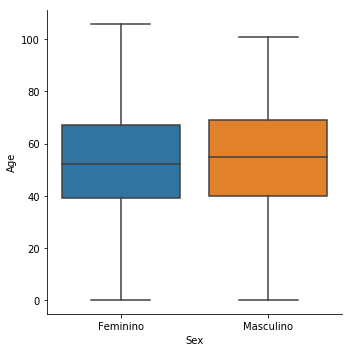

In [23]:
#Only shows the boxplot of observations with the sex recorded
sns.catplot(x="Sex", y="Age", kind="box", data=data_sex);

## Violin Plots

## Histograms and Barplots

### Histogram of average age grouped by a categorical variable

In [24]:
# Average age for each sex (Missing values removed)
Sex_by_Age = data_sex.groupby("Sex")["Age"].mean()
Sex_by_Age.head()

Sex
Feminino     51.483001
Masculino    52.350355
Name: Age, dtype: float64

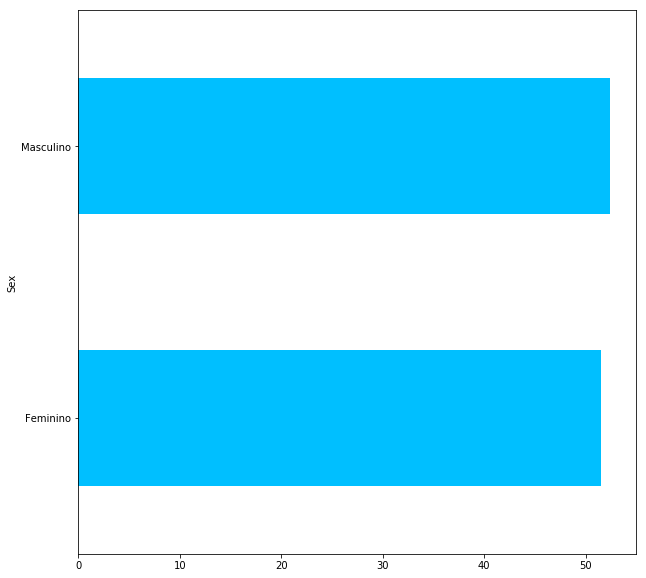

In [25]:
# Average age for each sex (Missing values removed) graphed
Sex_by_Age.plot.barh(color="deepskyblue");

### Barplots with count of a categorical variable

## Pie Charts

In [ ]:
# Add at a later date. Easier in excel. 

## Heatmaps

In [29]:
def pivot_count(df, rows, columns):
    df_pivot = df.pivot_table(values="FrequencyofVisits",
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [30]:
def heatmap_count(df, col1, col2):
    pivot_table = pivot_count(df,col1, col2)
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [38]:
# IMPORTANT : With large dataset, make sure to remove columns with a high cardinality
# Ideally have type for all of these 
interact(heatmap_count, col1=data.columns.drop(['UniqueID']),
                                 col2=data.columns.drop(['UniqueID']),
                                 df=fixed(data));

KeyError: "['UniqueID'] not found in axis"

In [41]:
heatmap_count(data_sex, "Sex","FrequencyofVisits")

KeyError: 'FrequencyofVisits'

## Joint plots

NOTE: These take forever to run. Run the third or forth one, which cut off the age at 22 and 15, respectively. 

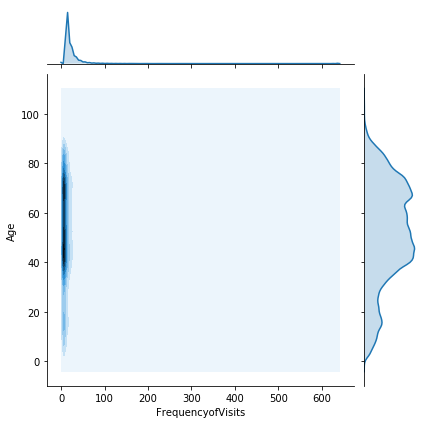

In [42]:
sns.jointplot(x=data["FrequencyofVisits"], y=data["Age"], kind='kde')

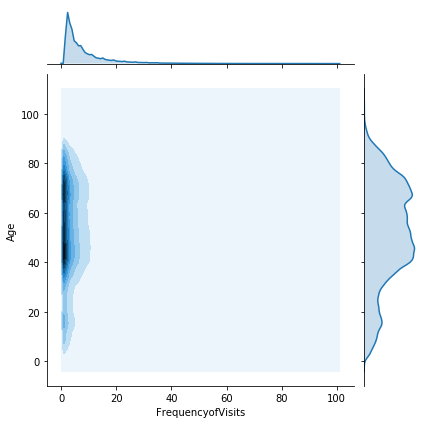

In [44]:
data_freq = data[data.FrequencyofVisits<=100]
sns.jointplot(x=data_freq["FrequencyofVisits"], y=data_freq["Age"], kind='kde')

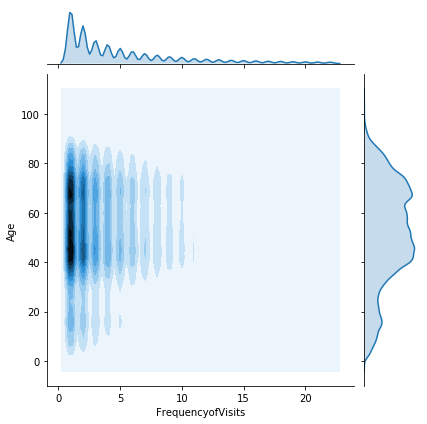

In [46]:
data_freq2 = data[data.FrequencyofVisits<=22]
sns.jointplot(x=data_freq2["FrequencyofVisits"], y=data_freq2["Age"], kind='kde')

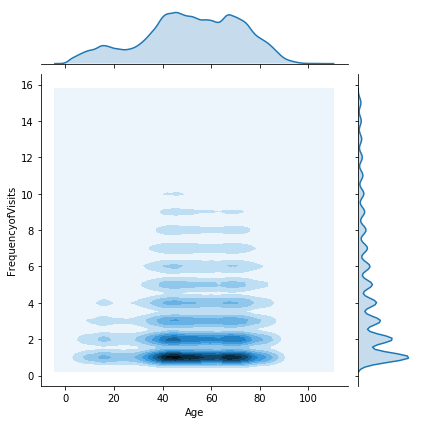

In [47]:
data_freq3 = data[data.FrequencyofVisits<=15]
sns.jointplot(x=data_freq3["Age"], y=data_freq3["FrequencyofVisits"], kind='kde')

In [ ]:
sns.jointplot(x=data["Age"], y=data["FrequencyofVisits"], kind='kde')